# Vizualizing the Data

The client BourbonBaked has asked for us to explore the enriched customer data to see if there are any interesting insights or callouts that would be beneficial for their marketing team with a national product launch. This file goes through that process with a summart of insights included at the end of the notebook.

- - - 

In [15]:
#importing packages needed
import requests
import pandas as pd
import json
import seaborn as sns
from matplotlib import pyplot as plt
import geopandas as gpd
from pathlib import Path

First we'll bring in the csv file we created at the end of the data_analysis notebook. This ensures we can play with the data here without affecting our original source data. 

In [16]:
data_folder2 = Path('enriched_customer_file.csv')
#file_to_open = data_folder / "states.csv"
df_customers = pd.read_csv(data_folder2)
df_customers.head()

,Unnamed: 0,name,age,job,incomeUSD,creditScore,ccNumber,married,hasChildren,height,...,address.countryCode,height_inches,weight_pounds,bmi,health,healthy_bmi_range,income level,region,state_population,state_per_capita_income
0,0,Charolette Carroll,42,Anthropologist,71247,823,6007-2224-9881-3450,False,False,166.0,...,BD,65.354331,178.1640,29.32,Overweight,18.5 - 25,Middle income,Midwest,779094,"66,184"
1,1,Lizette Muller,45,Uber Driver,31092,639,6771-8987-0818-5229,True,True,171.0,...,US,67.322835,144.4275,22.40,Normal,18.5 - 25,Low income,West,7151502,"56,667"
2,2,Ezra Champlin,19,Nuclear Medicine Technologist,82922,558,3742-496036-15098,False,False,160.0,...,BN,62.992126,121.2750,21.48,Healthy weight,5 - 85,Middle income,Northeast,3605944,"84,972"
3,3,Luana Jacobi,23,Retired,16786,797,6767-8698-8214-3742-85,True,False,160.0,...,ZM,62.992126,109.3680,19.37,Normal,18.5 - 25,Low income,Northeast,20201249,"78,089"
4,4,Wilmer Skiles,33,Psychiatrist,122929,543,6709009668675160,True,True,175.0,...,RW,68.897638,145.5300,21.55,Normal,18.5 - 25,Middle income,West,7705281,"75,698"


In [17]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               296 non-null    int64  
 1   name                     296 non-null    object 
 2   age                      296 non-null    int64  
 3   job                      296 non-null    object 
 4   incomeUSD                296 non-null    int64  
 5   creditScore              296 non-null    int64  
 6   ccNumber                 296 non-null    object 
 7   married                  296 non-null    bool   
 8   hasChildren              296 non-null    bool   
 9   height                   296 non-null    float64
 10  weight                   296 non-null    float64
 11  eyeColor                 296 non-null    object 
 12  email                    296 non-null    object 
 13  gender                   296 non-null    object 
 14  hasDegree                2

Since this is a large dataset, we'll split this into smaller groups to work with that may hold related data.

In [18]:
df_income = df_customers[['name','incomeUSD','address.state','region','income level','state_per_capita_income']]

df_health = df_customers[['name','height', 'weight','height_inches', 'weight_pounds', 'bmi',
       'health', 'healthy_bmi_range']]

In [19]:
df_health.head()

,name,height,weight,height_inches,weight_pounds,bmi,health,healthy_bmi_range
0,Charolette Carroll,166.0,80.8,65.354331,178.1640,29.32,Overweight,18.5 - 25
1,Lizette Muller,171.0,65.5,67.322835,144.4275,22.40,Normal,18.5 - 25
2,Ezra Champlin,160.0,55.0,62.992126,121.2750,21.48,Healthy weight,5 - 85
3,Luana Jacobi,160.0,49.6,62.992126,109.3680,19.37,Normal,18.5 - 25
4,Wilmer Skiles,175.0,66.0,68.897638,145.5300,21.55,Normal,18.5 - 25


The client mentioned already that this is a weight loss product and they would like to see if the typical consumer falls into the health range they consider most likely to purchase - those that are in the Overweight category. 

In [20]:
health_counts = df_health['health'].value_counts()

print(health_counts)

health
Normal               165
Overweight            88
Healthy weight        18
Obese Class I         12
Mild Thinness          7
Severe Thinness        2
Obese Class II         2
Moderate Thinness      1
Name: count, dtype: int64


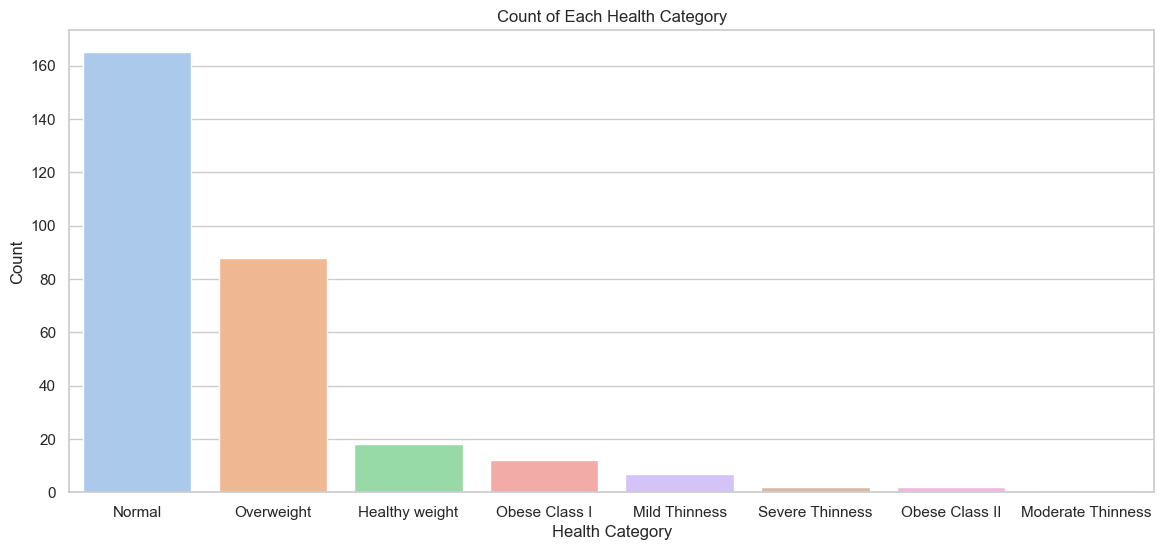

In [21]:
#making a bar chart
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))
sns.barplot(x=health_counts.index, y=health_counts.values, palette="pastel")
plt.xlabel("Health Category")
plt.ylabel("Count")
plt.title("Count of Each Health Category")
plt.show()

As noted in the graph, most beta purchasers fall into the Normal or Overweight category. Because we know the client is interested, let's dive into just those consumers who fall into the Overweight or Obese categories.

In [22]:
mask = df_customers['health'].isin(['Overweight', 'Obese Class I', 'Obese Class II'])
filtered_df = df_customers[mask]

filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 0 to 294
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               102 non-null    int64  
 1   name                     102 non-null    object 
 2   age                      102 non-null    int64  
 3   job                      102 non-null    object 
 4   incomeUSD                102 non-null    int64  
 5   creditScore              102 non-null    int64  
 6   ccNumber                 102 non-null    object 
 7   married                  102 non-null    bool   
 8   hasChildren              102 non-null    bool   
 9   height                   102 non-null    float64
 10  weight                   102 non-null    float64
 11  eyeColor                 102 non-null    object 
 12  email                    102 non-null    object 
 13  gender                   102 non-null    object 
 14  hasDegree                102 no

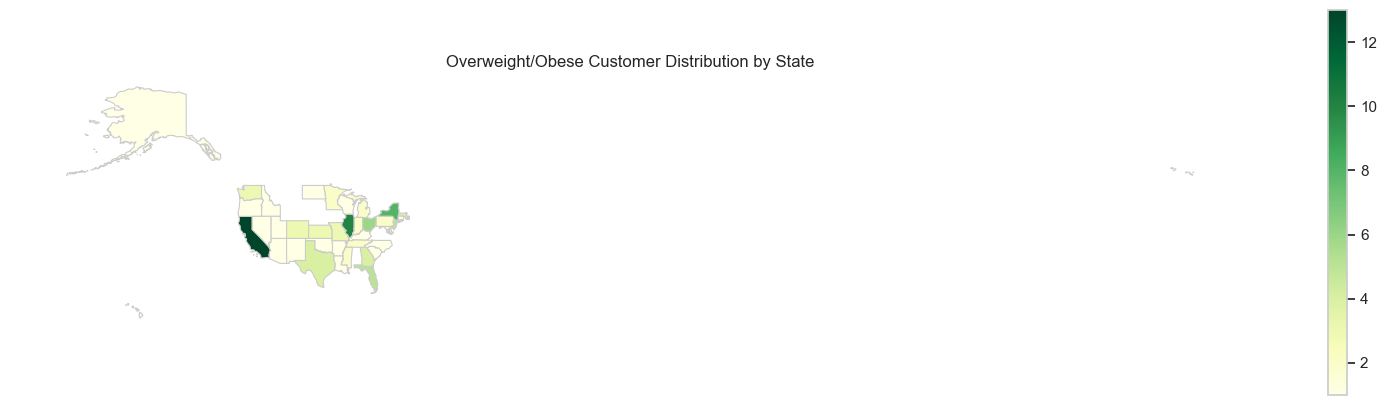

In [23]:
#making a map

data_folder2 = Path("data_file/")
file_to_open2 = data_folder2 / "cb_2016_us_state_20m/cb_2016_us_state_20m.shp"

#placefile
us_states = gpd.read_file(file_to_open2)

#getting a count of states
state_counts = filtered_df['address.state'].value_counts()

#fill states without customers with 0
state_counts.fillna(0, inplace=True)

#merge the state_counts_df with the shapefile based on the "state" column
merged_data = us_states.merge(state_counts, left_on='NAME', right_on='address.state', how='left')

#create the map
plt.figure(figsize=(20, 5))  
ax = plt.gca()
merged_data.plot(column='count', cmap='YlGn', linewidth=0.8, edgecolor='0.8', legend=True, ax=ax)

#Remove grud
ax.set_axis_off()

plt.title("Overweight/Obese Customer Distribution by State")
plt.show()

- California and Illinois have a high concentration of customers in the Overweight/Obese category that purchased the beta product. BourbonBaked might concentrate a marketing effort in these areas for their national launch. However, I think we can get more granular with this data set. 

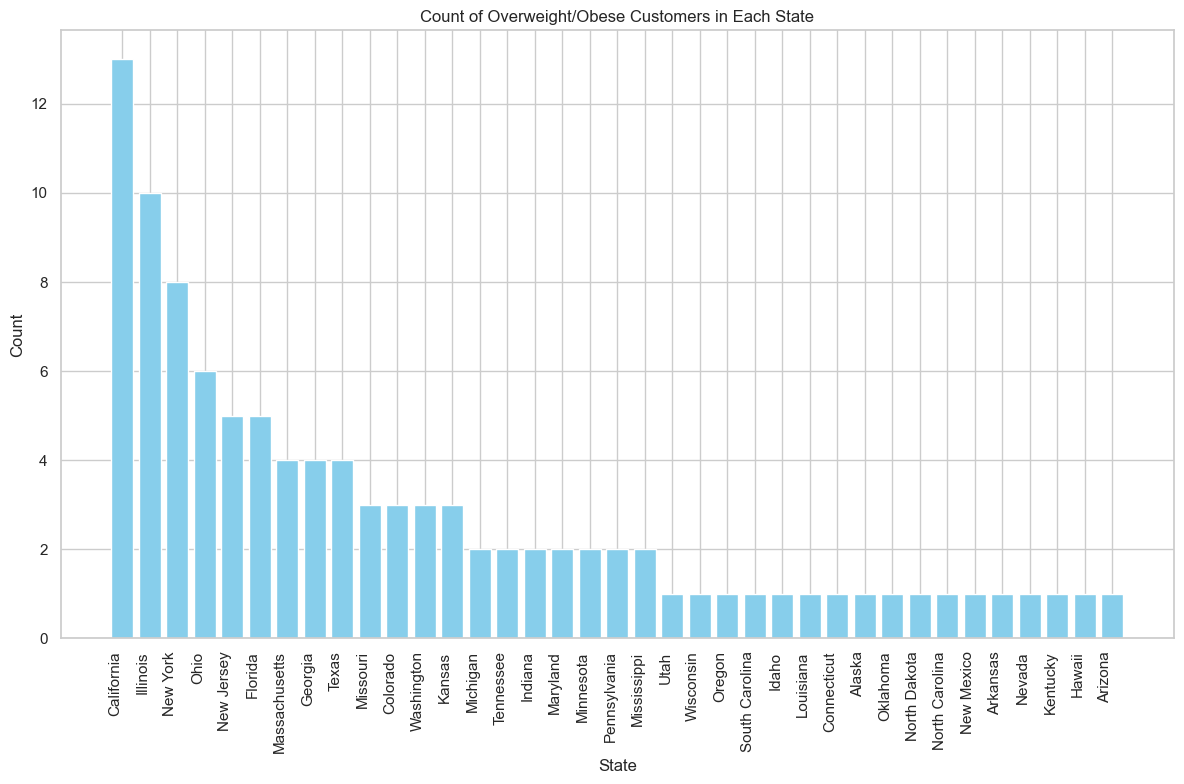

In [24]:
#sort states
state_counts_sorted = state_counts.sort_values(ascending=False)

#bar chart of states
plt.figure(figsize=(12, 8))
plt.bar(state_counts_sorted.index, state_counts_sorted, color='skyblue')
plt.xlabel("State")
plt.ylabel("Count")
plt.title("Count of Overweight/Obese Customers in Each State")
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

Let's take a look at just those states who have 2 or more overweight/obese purchasers of the beta product.

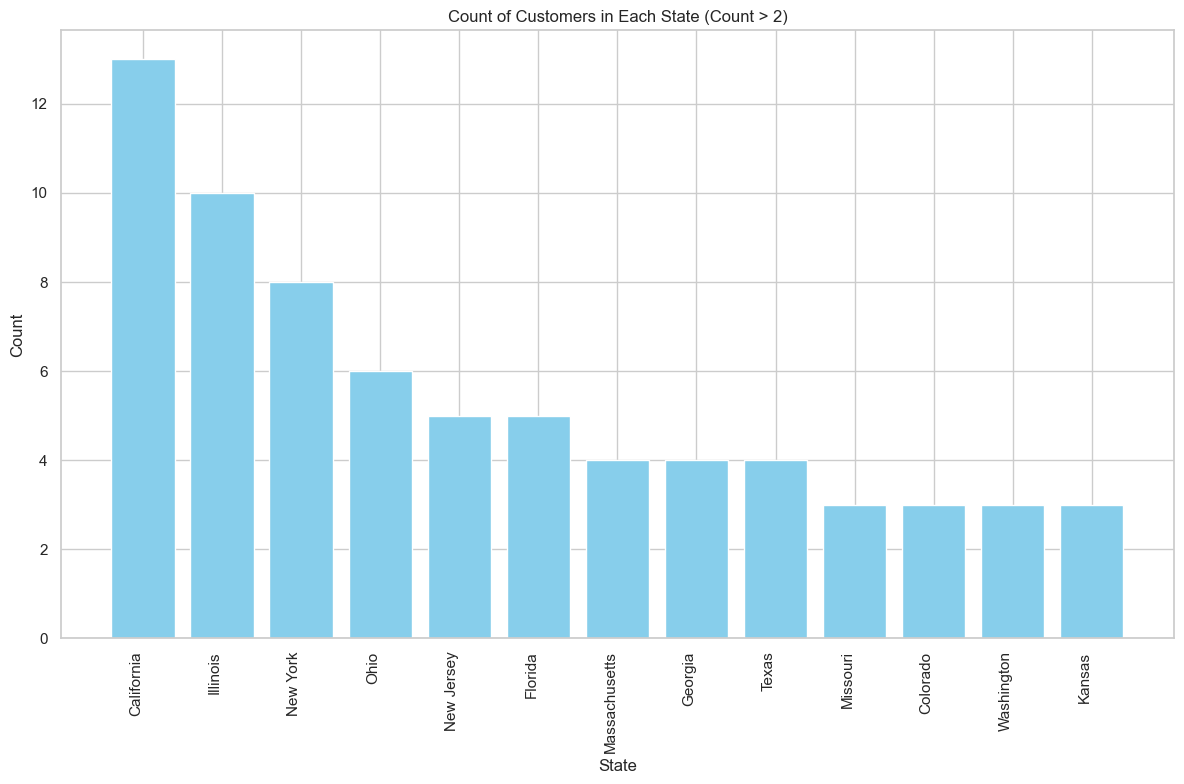

In [25]:
# Filter states with count higher than 2
state_counts_filtered = state_counts_sorted[state_counts_sorted > 2]

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.bar(state_counts_filtered.index, state_counts_filtered, color='skyblue')
plt.xlabel("State")
plt.ylabel("Count")
plt.title("Count of Customers in Each State (Count > 2)")
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


Now that we have the top five states (California, Illinois, New York, Ohio, and New Jersey) of overweight/obese purchasers, we can look into state level data we have against the customer data to see if we can tease out any insights. First, we'll make a dataframe of the state level data for reference. 

In [26]:
#deduplicated dataframe
deduplicated_df = df_customers[['address.state', 'state_population', 'state_per_capita_income']].drop_duplicates()

#sorted by population
deduplicated_df.sort_values(by='state_population', ascending=False, inplace=True)

deduplicated_df.reset_index(drop=True, inplace=True)

print(deduplicated_df)

     address.state  state_population state_per_capita_income
0       California          39538223                  77,339
1            Texas          29145505                  61,985
2          Florida          21538187                  63,597
3         New York          20201249                  78,089
4     Pennsylvania          13002700                  65,167
5         Illinois          12812508                  68,822
6             Ohio          11799448                  57,880
7          Georgia          10711908                  57,129
8   North Carolina          10439388                  57,416
9         Michigan          10077331                  56,813
10      New Jersey           9288994                  78,700
11        Virginia           8631393                  68,211
12      Washington           7705281                  75,698
13         Arizona           7151502                  56,667
14   Massachusetts           7029917                  84,945
15       Tennessee      

In [27]:
#looking at just those top 5 states
top_five = ['Illinois', 'California', 'New York', 'Ohio' ,'New Jersey']
top5_data = deduplicated_df[deduplicated_df['address.state'].isin(top_five)]
print(top5_data)

   address.state  state_population state_per_capita_income
0     California          39538223                  77,339
3       New York          20201249                  78,089
5       Illinois          12812508                  68,822
6           Ohio          11799448                  57,880
10    New Jersey           9288994                  78,700


Now that we have the state population and per capita income, I'd like to add in the average income of those customers who did indeed purchase in this state.

In [28]:
#average income for each state
average_income_by_state = filtered_df.groupby('address.state')['incomeUSD'].mean().round(0)

print(average_income_by_state)

address.state
Alaska             93694.0
Arizona            31975.0
Arkansas           37932.0
California         81241.0
Colorado           71595.0
Connecticut        82153.0
Florida            68824.0
Georgia            79414.0
Hawaii             36714.0
Idaho              73300.0
Illinois           74372.0
Indiana            71232.0
Kansas             60209.0
Kentucky           87668.0
Louisiana          54785.0
Maryland           37062.0
Massachusetts      57479.0
Michigan           96564.0
Minnesota          74388.0
Mississippi       115928.0
Missouri           63506.0
Nevada             68647.0
New Jersey         45571.0
New Mexico         86234.0
New York           53986.0
North Carolina     50302.0
North Dakota       71247.0
Ohio               72341.0
Oklahoma               0.0
Oregon             55551.0
Pennsylvania       90681.0
South Carolina     67567.0
Tennessee          38810.0
Texas              70065.0
Utah               37585.0
Washington         45607.0
Wisconsin     

In [29]:
#merging average income into top five
top_five = top5_data.merge(average_income_by_state, left_on='address.state', right_index=True, how='left')

top_five.rename(columns={'incomeUSD': 'avg customer income'}, inplace=True)

top_five.head()

,address.state,state_population,state_per_capita_income,avg customer income
0,California,39538223,"77,339",81241.0
3,New York,20201249,"78,089",53986.0
5,Illinois,12812508,"68,822",74372.0
6,Ohio,11799448,"57,880",72341.0
10,New Jersey,9288994,"78,700",45571.0


This is a potentially interesting finding to the client. New Jersey is in the top 5 purchases from those clients classified as overweight or obese, despite it being a smaller population base. Additionally, the average income of a New Jersey purchaser from the beta group is significantly lower than the state per capita income. This could be a great opportunity to try additional marketing through means of appealing to that customer base while in New Jersey. Target areas of the state where the income is lower with more marketing spend that those of higher affluence. 

- - - 

Going back to the original dataset, let's explore another path that could be interesting. Let's see the top states where the product was purchased for ALL beta customers, not just those who fall into the Overweight/Obese category

In [30]:
state_counts_total = df_customers['address.state'].value_counts()

state_counts__total_sorted = state_counts_total.sort_values(ascending=False)

state_counts__total_sorted.head()


address.state
California    40
Florida       22
Illinois      21
New Jersey    18
New York      16
Name: count, dtype: int64

Since California includes the highest purchasers, let's explore that state

In [31]:
california_customers = df_customers[df_customers['address.state'] == 'California']

gender_breakdown_california = california_customers['gender'].value_counts()

print(gender_breakdown_california)

gender
Female    27
Male      13
Name: count, dtype: int64


By far more females purchased this product in California than males. Let's gather data on those females to help create look a like audiences

In [32]:
#only include female customers in California

female_customers_california = df_customers[
    (df_customers['gender'] == 'Female') &
    (df_customers['address.state'] == 'California')
]

#has Children
has_children_count = female_customers_california['hasChildren'].value_counts()

#has degree
has_degree_count = female_customers_california['hasDegree'].value_counts()


print("Count of 'hasChildren' among female customers in California:")
print(has_children_count)

print("\nCount of 'hasDegree' among female customers in California:")
print(has_degree_count)

Count of 'hasChildren' among female customers in California:
hasChildren
False    17
True     10
Name: count, dtype: int64

Count of 'hasDegree' among female customers in California:
hasDegree
False    18
True      9
Name: count, dtype: int64


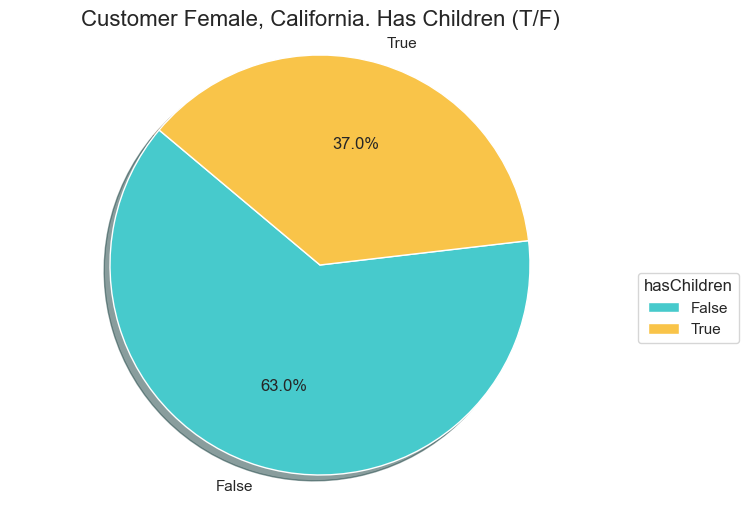

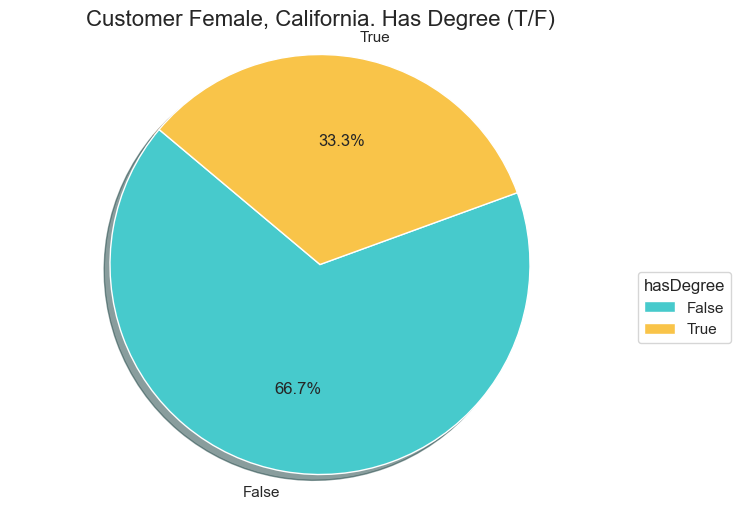

In [33]:
#making a pie chart - has Children
colors = ['#47CACC', '#F9C449']


plt.figure(figsize=(8, 6))
plt.pie(has_children_count, labels=has_children_count.index, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title("Customer Female, California. Has Children (T/F)", fontsize=16)
plt.axis('equal')


plt.legend(title='hasChildren', labels=has_children_count.index, loc='best', bbox_to_anchor=(1, 0.5))
plt.show()

#making a pie chart - has Degree
plt.figure(figsize=(8, 6))
plt.pie(has_degree_count, labels=has_degree_count.index, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title("Customer Female, California. Has Degree (T/F)", fontsize=16)
plt.axis('equal')

plt.legend(title='hasDegree', labels=has_degree_count.index, loc='best', bbox_to_anchor=(1, 0.5))
plt.show()

This is another potential insight. In the California market, the biggest buyers are females without degrees and without children, so likely a younger demographic in this area. It would be a good idea to market slightly younger here. 

---

Going back to the original dataset, let's explore another path that could be interesting. I'd like to explore the overall age of the beta purchaser

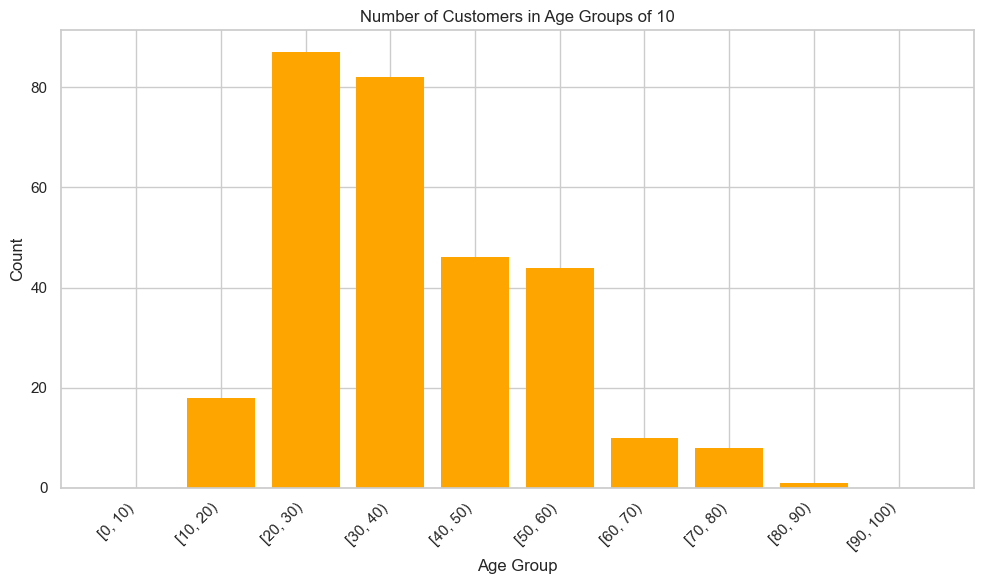

In [34]:
#making bins
age_groups = pd.cut(df_customers['age'], bins=range(0, 101, 10), right=False)

age_counts = age_groups.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(age_counts.index.astype(str), age_counts.values, color='orange', edgecolor='none')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Number of Customers in Age Groups of 10')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- The primary age group purchasing this product is in the 20 - 40 year old age range, indicating that the company might want to target their marketing efforts towards Millennials and Generation Z, focusing slightly more on Gen Z as the main purchaser was in the 20-30 year old age range. 

In [35]:
print(age_counts)

age
[0, 10)       0
[10, 20)     18
[20, 30)     87
[30, 40)     82
[40, 50)     46
[50, 60)     44
[60, 70)     10
[70, 80)      8
[80, 90)      1
[90, 100)     0
Name: count, dtype: int64


- - - 

## Findings
- This is a potentially interesting finding to the client. New Jersey is in the top 5 purchases from those clients classified as overweight or obese, despite it being a smaller population base. Additionally, the average income of a New Jersey purchaser from the beta group is significantly lower than the state per capita income. This could be a great opportunity to try additional marketing through means of appealing to that customer base while in New Jersey. Target areas of the state where the income is lower with more marketing spend that those of higher affluence.  

In [36]:
top_five.head()

,address.state,state_population,state_per_capita_income,avg customer income
0,California,39538223,"77,339",81241.0
3,New York,20201249,"78,089",53986.0
5,Illinois,12812508,"68,822",74372.0
6,Ohio,11799448,"57,880",72341.0
10,New Jersey,9288994,"78,700",45571.0


- This is another potential insight. In the California market, the largest buying group is females without degrees and without children, so likely a younger demographic in this area. It would be a good idea to market slightly younger here as well as target the advertisements towards females without children. 

In [37]:
print(has_degree_count)
print(has_children_count)

hasDegree
False    18
True      9
Name: count, dtype: int64
hasChildren
False    17
True     10
Name: count, dtype: int64


- The primary age group purchasing this product is in the 20 - 40 year old age range, indicating that the company might want to target their marketing efforts towards Millennials and Generation Z, focusing slightly more on Gen Z as the main purchaser was in the 20-30 year old age range. 

In [38]:
print(age_counts)

age
[0, 10)       0
[10, 20)     18
[20, 30)     87
[30, 40)     82
[40, 50)     46
[50, 60)     44
[60, 70)     10
[70, 80)      8
[80, 90)      1
[90, 100)     0
Name: count, dtype: int64


Overall, it can be hard to assess a small data set but based on what we could gather the above three strategies might work to better segment audiences for a national campaign launch.